In [1]:
import os
import json
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
from functools import reduce
import operator
import matplotlib.pyplot as plt


In [2]:
!ls

02-20-2022-19_31_36_hashmap_Wiki.json
02-20-2022-19_34_01_hashmap_Wiki.json
02-20-2022-19_36_21_hashmap_Wiki.json
02-20-2022-19_56_33_rocksdb_Wiki.json
02-20-2022-19_59_03_rocksdb_Wiki.json
02-20-2022-20_02_14_rocksdb_Wiki.json
02-20-2022-20_23_05_redpanda_Wiki.json
02-20-2022-20_56_21_redpanda_Wiki.json
02-22-2022-19_32_23_redpanda_Wiki.json
02-22-2022-19_43_20_redpanda_Wiki.json
06-15-2022-23_14_45_redpanda_Wiki.json
06-15-2022-23_18_09_redpanda_Wiki.json
06-15-2022-23_24_24_redpanda_Wiki.json
06-16-2022-00_10_41_redpanda_Wiki.json
100_06-16-2022-01_38_10_redpanda_Wiki.json
100_10x1_06-22-2022-00_54_34_redpanda_Wiki.json
100_1x1_06-22-2022-00_31_45_redpanda_Wiki.json
100_3x1_06-22-2022-00_37_04_redpanda_Wiki.json
100_5x1_06-22-2022-00_44_49_redpanda_Wiki.json
10_06-16-2022-02_10_57_redpanda_Wiki.json
500_06-16-2022-03_00_22_redpanda_Wiki.json
__init__.py
process_experiments.ipynb
query_engine_analysis.ipynb
run_experiments.py
utils


In [3]:
results = {
    "10ms": "10_06-16-2022-02_10_57_redpanda_Wiki.json",
    "100ms": "100_06-16-2022-01_38_10_redpanda_Wiki.json",
    "500ms": "500_06-16-2022-03_00_22_redpanda_Wiki.json",
    "100ms, 1 producer": "100_1x1_06-22-2022-00_31_45_redpanda_Wiki.json",
    "100ms, 3 producers": "100_3x1_06-22-2022-00_37_04_redpanda_Wiki.json",
    "100ms, 5 producers": "100_5x1_06-22-2022-00_44_49_redpanda_Wiki.json",
    "100ms, 10 producers": "100_10x1_06-22-2022-00_54_34_redpanda_Wiki.json"    
#     "1000ms": "06-16-2022-00_10_41_redpanda_Wiki.json"
}

def get_runtimes(filename):
    runtimes = []
    with open(filename) as json_file:
        data = json.load(json_file)
        for data_dict in data:
            if("[FLINK_QUESTDB_RUNTIME]" in data_dict):
                runtimes.append(data_dict["[FLINK_QUESTDB_RUNTIME]"][0][-1])
                
    return runtimes
    

def get_snapshot_times(filename):
    
    snapshot_times = []

    with open(filename) as json_file:
        data = json.load(json_file)
        
        for data_dict in data:
            if("[SNAPSHOT_TIME]" in data_dict):
                for x in data_dict["[SNAPSHOT_TIME]"][0]:
                    snapshot_times.append(x)
        
#     print(len(snapshot_times))
    return snapshot_times

In [5]:
print(np.mean(get_runtimes(results["10ms"])))
print(np.mean(get_runtimes(results["100ms"])))
print(np.mean(get_runtimes(results["500ms"])))
print(np.mean(get_runtimes(results["100ms, 1 producer"])))
print(np.mean(get_runtimes(results["100ms, 3 producers"])))
print(np.mean(get_runtimes(results["100ms, 5 producers"])))
print(np.mean(get_runtimes(results["100ms, 10 producers"])))

32829.9
24696.7
30766.7
6783.0
19327.0
31896.5
70159.1


10ms 0.044187 0.072121 0.091127 0.459719
100ms 0.038779 0.062834 0.080237 0.297456
500ms 0.055122 0.088828 0.10698 0.310118
100ms, 1 producer 0.038916 0.062072 0.072344 0.105903
100ms, 3 producers 0.04696 0.063486 0.071206 0.095453
100ms, 5 producers 0.045544 0.06628 0.074943 0.106272
100ms, 10 producers 0.031502 0.057895 0.066849 0.094985


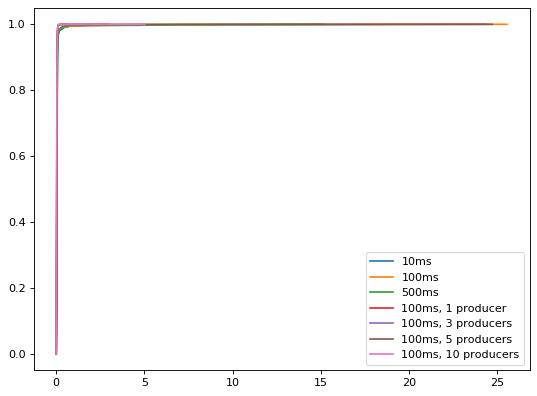

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

for label, filename in results.items():
    snapshot_times = np.array(get_snapshot_times(filename)).ravel()
    
#     print(snapshot_times)
    
    N = len(snapshot_times)
    Z = np.sort(np.array(snapshot_times) / 1e6) # to ms
#     print(label, Z)
    
    # calculate the proportional values of samples
    p = 1. * np.arange(len(Z)) / (len(Z) - 1)
#     print(np.arange(len(Z)))

    print(label, Z[p > 0.5][0], Z[p > 0.9][0], Z[p > 0.95][0], Z[p > 0.99][0])

    plt.plot(Z, p, label = label)
    
plt.legend()
plt.show()

In [46]:

# method 1




In [ ]:




 
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f) as json_file:
        data = json.load(json_file)
        if len(data) == 0:
            continue

        benchmark = data[0]["benchmark"]
        if benchmark not in benchmark_tables:
            benchmark_tables[benchmark] = get_table_template()
        table = benchmark_tables[benchmark]

        table["Backend"].append(data[0]["backend"])
        table["Number of machines"].append(max([run.get("job", 0) for run in data])+1)

        times = np.array([run.get("time", "") for run in data if type(run.get("time", "")) != type("")]) #Filter errors and latency recordings
        table["Average Time for job (ms)"].append(round(np.average(times)))
        table["Standard Deviation"].append(round(np.std(times)))

        latencies = [run.get("latencies", [[]]) for run in data]
        if benchmark == "Wiki":
            latencies = [list(map(lambda x: x[1:], l)) for l in latencies] #Remove first latency as it is a warmup
        latencies = np.array(reduce(operator.concat, reduce(operator.concat, latencies))) #Flatten list of latencies
        latencies = latencies[latencies <= 100] #Ignore latencies over 100 ms
        table["Latency (ms)"].append(np.average(latencies) if len(latencies)>0 else "")

for benchmark in benchmark_tables:
    df = pd.DataFrame(benchmark_tables[benchmark])
    df = df.sort_values(["Number of machines", "Backend"], ascending = (True, True))
    print(f"\t\t       \t\t\t {benchmark} Benchmark")
    print(df, "\n\n")
